# PCA through Singular Value Decomposition

In [5]:
import numpy as np

# Define 3 points in 2D-space:
X = np.array([[2, 1, 0], [4, 3, 0]])

# Calculate the covariance matrix:
R = np.cov(X)
print("Covariance Matrix:\n", R)

# Calculate the SVD decomposition and new basis vectors:
[U, D, V] = np.linalg.svd(R)  # SVD decomposition
u1 = U[:, 0]  # New basis vectors
u2 = U[:, 1]
print("New Basis Vectors:\n", u1, "\n", u2)

# Calculate the coordinates in new orthonormal basis:
Xi1 = np.dot(u1.T, X)  # Projection on first basis vector
Xi2 = np.dot(u2.T, X)  # Projection on second basis vector
print("Coordinates in new basis:\n", Xi1, "\n", Xi2)

# Calculate the approximation of the original from the new basis:
X_approx = (Xi1[:, None] * u1[:, None].T) + (Xi2[:, None] * u2[:, None].T)
print("Approximated Original Points:\n", X_approx)

# Check that you got the original:
print("Original Points:\n", X)


Covariance Matrix:
 [[1.         2.        ]
 [2.         4.33333333]]
New Basis Vectors:
 [-0.4241554  -0.90558942] 
 [-0.90558942  0.4241554 ]
Coordinates in new basis:
 [-4.47066848 -3.14092366  0.        ] 
 [-0.11455726  0.36687677  0.        ]
Approximated Original Points:
 [[ 2.  4.]
 [ 1.  3.]
 [-0.  0.]]
Original Points:
 [[2 1 0]
 [4 3 0]]


# PCA on Iris data

In [6]:
# Load Iris dataset as in the last PC lab:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[:])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


<function matplotlib.pyplot.show(close=None, block=None)>

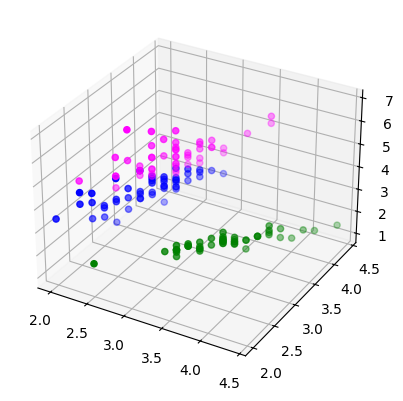

In [8]:
# We have 4 dimensions of data, plot the first three colums in 3D
X=iris.data
y=iris.target
import matplotlib.pyplot as plt
axes1=plt.axes(projection='3d')
axes1.scatter3D(X[y==0,1],X[y==0,1],X[y==0,2],color='green')
axes1.scatter3D(X[y==1,1],X[y==1,1],X[y==1,2],color='blue')
axes1.scatter3D(X[y==2,1],X[y==2,1],X[y==2,2],color='magenta')
plt.show


PCA Covariance Matrix:
 [[ 2.93808505e+00 -2.30438603e-16  2.98421764e-17]
 [-2.30438603e-16  9.20164904e-01 -4.99495797e-16]
 [ 2.98421764e-17 -4.99495797e-16  1.47741821e-01]]


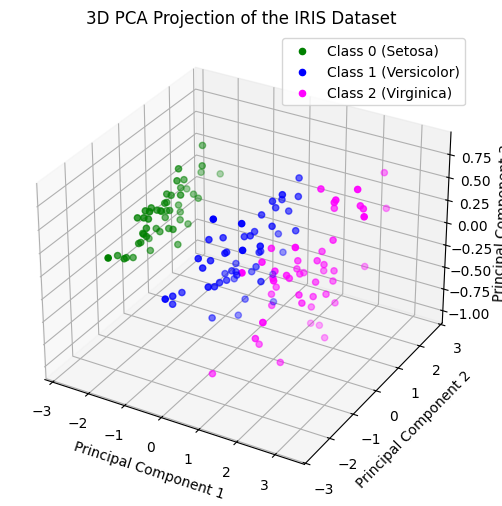

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the IRIS dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Apply StandardScaler (zero mean, unit variance)
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)  # Preprocessed data

# Define PCA object (three components), fit and transform the data
pca = decomposition.PCA(n_components=3)
Xpca = pca.fit_transform(Xpp)

# Print the covariance matrix (only valid if 'whiten=True' is not set in PCA)
print("PCA Covariance Matrix:\n", np.cov(Xpca.T))

# Plot the transformed feature space in 3D
fig = plt.figure(figsize=(8, 6))
axes2 = fig.add_subplot(111, projection='3d')

# Scatter plot for each class
axes2.scatter3D(Xpca[y == 0, 0], Xpca[y == 0, 1], Xpca[y == 0, 2], color='green', label='Class 0 (Setosa)')
axes2.scatter3D(Xpca[y == 1, 0], Xpca[y == 1, 1], Xpca[y == 1, 2], color='blue', label='Class 1 (Versicolor)')
axes2.scatter3D(Xpca[y == 2, 0], Xpca[y == 2, 1], Xpca[y == 2, 2], color='magenta', label='Class 2 (Virginica)')

# Labels and title
axes2.set_xlabel("Principal Component 1")
axes2.set_ylabel("Principal Component 2")
axes2.set_zlabel("Principal Component 3")
axes2.set_title("3D PCA Projection of the IRIS Dataset")
axes2.legend()

plt.show()


In [3]:
# Compute pca.explained_variance_ and pca.explained_cariance_ratio_values
pca.explained_variance_

array([2.93808505, 0.9201649 , 0.14774182])

In [4]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762, 0.03668922])

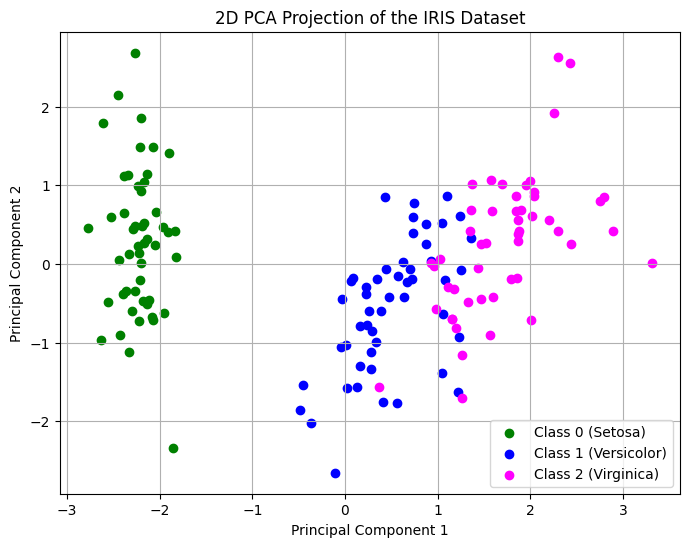

In [6]:
# Plot the principal components in 2D, mark different targets in color
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# Load the IRIS dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Apply StandardScaler (zero mean, unit variance)
Xscaler = StandardScaler()
Xpp = Xscaler.fit_transform(X)

# Apply PCA and reduce to 2 components
pca = decomposition.PCA(n_components=2)
Xpca = pca.fit_transform(Xpp)

# Plot the transformed feature space in 2D
plt.figure(figsize=(8, 6))
plt.scatter(Xpca[y == 0, 0], Xpca[y == 0, 1], color='green', label='Class 0 (Setosa)')
plt.scatter(Xpca[y == 1, 0], Xpca[y == 1, 1], color='blue', label='Class 1 (Versicolor)')
plt.scatter(Xpca[y == 2, 0], Xpca[y == 2, 1], color='magenta', label='Class 2 (Virginica)')

# Labels and title
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection of the IRIS Dataset")
plt.legend()
plt.grid(True)

plt.show()


# KNN classifier

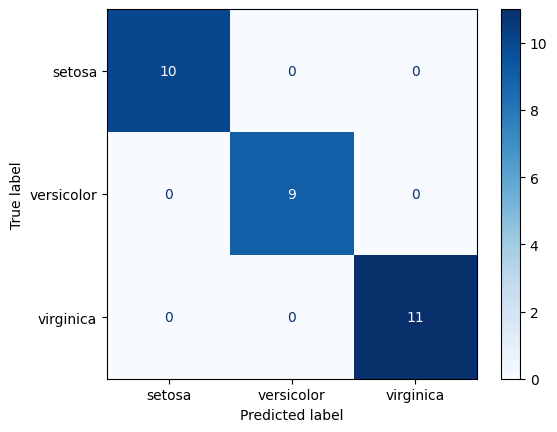

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Labels

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train, y_train)

# Predict on test set
Ypred = knn1.predict(X_test)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')

# Show plot
import matplotlib.pyplot as plt
plt.show()


Text(0.5, 1.0, 'Confusion Matrix - KNN on PCA-transformed Data')

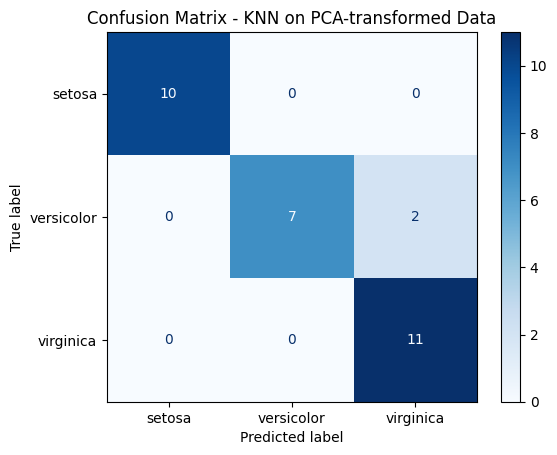

In [10]:
# Now do the same (data set split, KNN, confusion matrix), but for PCA-transformed data (1st two principal components, i.e., first two columns).
# Compare the results with full dataset
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()
X = iris.data  # Features (4D)
y = iris.target  # Labels

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (reduce to 2 principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split PCA-transformed data into train and test sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train KNN classifier on PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# Predict on test set
Ypred_pca = knn_pca.predict(X_test_pca)

# Compute and display confusion matrix
cm_pca = confusion_matrix(y_test, Ypred_pca)
disp_pca = ConfusionMatrixDisplay(confusion_matrix=cm_pca, display_labels=iris.target_names)
disp_pca.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN on PCA-transformed Data")


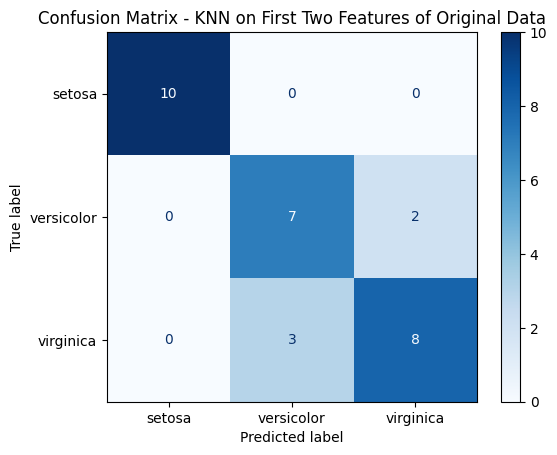

In [11]:
# Now do the same, but use only 2-dimensional data of original X (first two columns)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load dataset
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two original features
y = iris.target

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict on test set
Ypred = knn.predict(X_test)

# Compute and display confusion matrix
cm = confusion_matrix(y_test, Ypred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - KNN on First Two Features of Original Data")
plt.show()
